F1-score (avg): 0.5748590934349449  std: 0.16296022580095507
Accuracy (avg): 0.8352272727272727  std: 0.03361408967670237

F1-scores per fold: [0.58823529 0.73684211 0.66666667 0.30769231]
Accuracies per fold: [0.84090909 0.88636364 0.81818182 0.79545455]


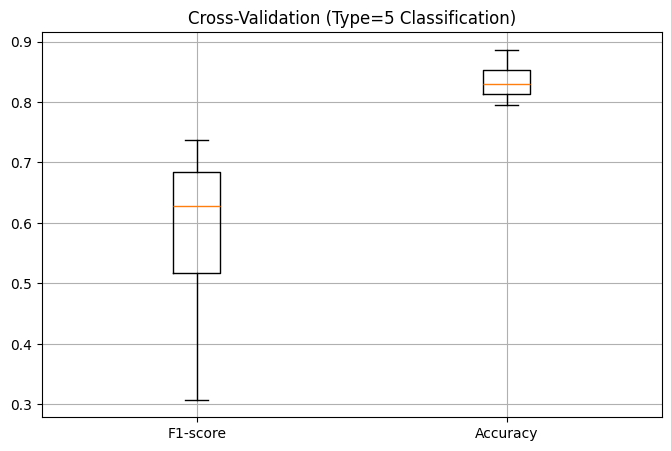

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_validate
from sklearn.neural_network import MLPClassifier

# ----------------------------
# 1. 读取排序后的训练数据
# ----------------------------
# 修改点：读取用户提供的sorted_data.csv文件
# df_sorted = pd.read_csv("sorted_data.csv")
train_data = pd.read_excel('Data_Set_(A+B).xlsx')
# ----------------------------
# 2. 特征/目标分离（保持原始逻辑）
# ----------------------------
# 修改点：将type=5转换为二分类目标
X = train_data.drop(columns=["Type"])  # 假设特征列不包含type列
y = (train_data["Type"] == 5).astype(int)  # 将type=5转为1，其他转为0

# ----------------------------
# 3. 对 X 特征进行归一化处理
# ----------------------------
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# ----------------------------
# 4. 定义 MLP 模型（保持原始配置）
# ----------------------------
model = MLPClassifier(
    hidden_layer_sizes=(50, 50,25),   # 隐藏层结构
    activation='relu',          # 激活函数
    solver='lbfgs',              # 优化器
    max_iter=500,               # 最大迭代次数
    random_state=42             # 固定随机种子
)

# ----------------------------
# 5. 使用交叉验证评估
# ----------------------------
scoring = {'f1': 'f1', 'accuracy': 'accuracy'}
scores = cross_validate(model, X_scaled, y, cv=4, scoring=scoring)

# ----------------------------
# 6. 打印得分结果
# ----------------------------
print("F1-score (avg):", scores['test_f1'].mean(), " std:", scores['test_f1'].std())
print("Accuracy (avg):", scores['test_accuracy'].mean(), " std:", scores['test_accuracy'].std())

print("\nF1-scores per fold:", scores['test_f1'])
print("Accuracies per fold:", scores['test_accuracy'])

# ----------------------------
# 7. 可视化评分分布
# ----------------------------
plt.figure(figsize=(8, 5))
plt.boxplot(
    [scores['test_f1'], scores['test_accuracy']],
    tick_labels=['F1-score', 'Accuracy']
)
plt.title("Cross-Validation (Type=5 Classification)")
plt.grid(True)
plt.show()

c:\Users\HUAWEI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\HUAWEI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\HUAWEI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\HUAWEI\AppData\Local\P

模型评估结果（type=5分类）：
             layers activation solver  F1-avg  F1-std  Acc-avg  Acc-std
5             (64,)       relu  lbfgs  0.5798  0.1863   0.7102   0.2229
11         (64, 32)       tanh  lbfgs  0.5612  0.1158   0.7557   0.1259
17     (50, 25, 12)       tanh  lbfgs  0.5532  0.1778   0.7216   0.1828
4      (50, 25, 12)       tanh  lbfgs  0.5532  0.1778   0.7216   0.1828
13     (50, 50, 25)       relu   adam  0.5318  0.1457   0.7102   0.1763
9   (50, 25, 12, 6)       relu  lbfgs  0.5295  0.1729   0.7159   0.2348
6         (128, 64)       relu  lbfgs  0.5270  0.2159   0.6932   0.1998
16    (128, 64, 32)       relu  lbfgs  0.5126  0.1615   0.6875   0.2128
15        (100, 50)       tanh   adam  0.4891  0.1392   0.7045   0.1499
3      (50, 25, 12)       relu  lbfgs  0.4536  0.1109   0.6307   0.2297


C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_23468\1086365237.py:106: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_23468\1086365237.py:106: UserWarning: Glyph 31867 (\N{CJK UNIFIED IDEOGRAPH-7C7B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_23468\1086365237.py:106: UserWarning: Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_23468\1086365237.py:106: UserWarning: Glyph 33021 (\N{CJK UNIFIED IDEOGRAPH-80FD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_23468\1086365237.py:106: UserWarning: Glyph 23545 (\N{CJK UNIFIED IDEOGRAPH-5BF9}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_23468\1086365237.py:106: UserWarning: Gl

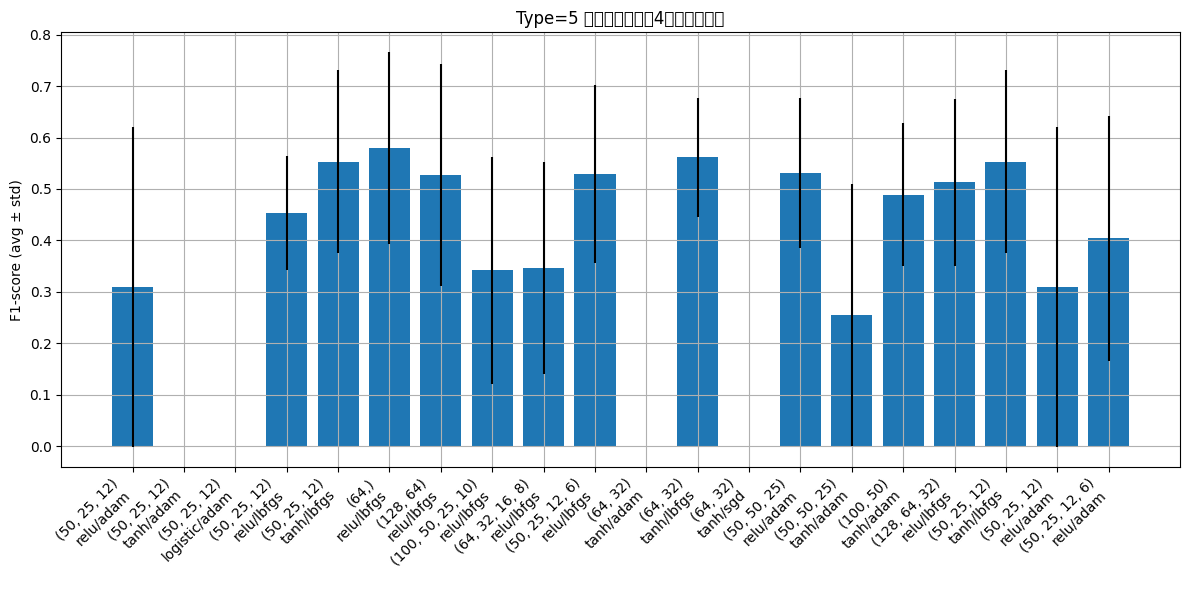

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# ----------------------------
# 1. 加载数据（使用用户提供的sorted_data.csv）
# ----------------------------
df = pd.read_csv("sorted_data.csv")  # 替换为实际数据文件路径

# ----------------------------
# 2. 特征/目标分离（保持原始逻辑）
# ----------------------------
# 修改点：将type=5转换为二分类目标
X = df.drop(columns=["Type"])  # 假设特征列不包含type列
y = (df["Type"] == 5).astype(int)  # 将type=5转为1，其他转为0

# ✅ 如需归一化数据，取消注释下列两行：
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# ----------------------------
# 3. 模型配置（保持原始结构）
# ----------------------------
config_list = config_list = [
    # 原始配置组
    {"layers": (50, 25, 12), "activation": "relu", "solver": "adam"},
    {"layers": (50, 25, 12), "activation": "tanh", "solver": "adam"},
    {"layers": (50, 25, 12), "activation": "logistic", "solver": "adam"},
    {"layers": (50, 25, 12), "activation": "relu", "solver": "lbfgs"},
    {"layers": (50, 25, 12), "activation": "tanh", "solver": "lbfgs"},
    
    # 扩展结构组
    {"layers": (64,), "activation": "relu", "solver": "lbfgs"},
    {"layers": (128, 64), "activation": "relu", "solver": "lbfgs"},
    {"layers": (100, 50, 25, 10), "activation": "relu", "solver": "lbfgs"},
    {"layers": (64, 32, 16, 8), "activation": "relu", "solver": "lbfgs"},
    {"layers": (50, 25, 12, 6), "activation": "relu", "solver": "lbfgs"},
    
    # 混合配置组
    {"layers": (64, 32), "activation": "tanh", "solver": "adam"},
    {"layers": (64, 32), "activation": "tanh", "solver": "lbfgs"},
    {"layers": (64, 32), "activation": "tanh", "solver": "sgd"},
    
    {"layers": (50, 50,25), "activation": "relu", "solver": "adam"},
    {"layers": (50, 50,25), "activation": "tanh", "solver": "adam"},
    {"layers": (100, 50), "activation": "tanh", "solver": "adam"},
    {"layers": (128, 64, 32), "activation": "relu", "solver": "lbfgs"},
    {"layers": (50, 25, 12), "activation": "tanh", "solver": "lbfgs"},
    {"layers": (50, 25, 12), "activation": "relu", "solver": "adam"},
    {"layers": (50, 25, 12,6), "activation": "relu", "solver": "adam"},
]

# ----------------------------
# 4. 评估流程（保持原始逻辑）
# ----------------------------
results = []
for config in config_list:
    model = MLPClassifier(
        hidden_layer_sizes=config["layers"],
        activation=config["activation"],
        solver=config["solver"],
        max_iter=500,
        random_state=42
    )
    
    scores = cross_validate(
        model, X, y,
        cv=4,
        scoring={"f1": "f1", "accuracy": "accuracy"}
    )
    
    results.append({
        "layers": config["layers"],
        "activation": config["activation"],
        "solver": config["solver"],
        "F1-avg": round(scores["test_f1"].mean(), 4),
        "F1-std": round(scores["test_f1"].std(), 4),
        "Acc-avg": round(scores["test_accuracy"].mean(), 4),
        "Acc-std": round(scores["test_accuracy"].std(), 4)
    })

# ----------------------------
# 5. 输出结果表格
# ----------------------------
result_df = pd.DataFrame(results)
print("模型评估结果（type=5分类）：")
print(result_df.sort_values(by="F1-avg", ascending=False).head(10))

# ----------------------------
# 6. 可视化 F1-score 对比
# ----------------------------
plt.figure(figsize=(12, 6))
plt.bar(
    range(len(result_df)),
    result_df["F1-avg"],
    yerr=result_df["F1-std"],
    tick_label=[f"{r['layers']}\n{r['activation']}/{r['solver']}" for r in results]
)
plt.ylabel("F1-score (avg ± std)")
plt.xticks(rotation=45, ha='right')
plt.title("Type=5 分类性能对比")
plt.grid(True)
plt.tight_layout()
plt.show()